# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [262]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 200)

### Read the dataset

In [3]:
# loading the dataset
data = pd.read_csv("EasyVisa.csv")

In [4]:
# Make a copy of the dataset
df = data.copy()

In [5]:
np.random.seed(1)
data.sample(200)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


In [6]:
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [7]:
data.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


In [8]:
# check number of rows and columns
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns.

### Check for any missing data

In [9]:
#check for missing data
data.isna().sum().sort_values(ascending=False)

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing data 

### Check the info of the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


*  Many of the columns are of the type object. These will need to be treated before the model is built.

#### Check for duplicates

In [11]:
### Let's check the duplicate data. And if any, we should remove it.

In [12]:
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- Ther are no duplicates

In [13]:
# Let's look at the statistical summary of the data
data.describe(exclude = "object").T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- 50% of the employer's company have around 2110 employees , there is a min value of -26, which might be an error
- yr_of_estab, most of the firms are established in 1970 to 2000
- As prevailing_wage is of differnt unit , much could not be infered from this summary. EDA will reveal better info

In [14]:
data.describe(include=["object"])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV6152,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


- Case_id may not be a contibuting factor to the final outcome. 
- Most of the employee are from Asia continent.
- Majority of the employee have Bachelor's education.
- Most employee dont need job training indication they might have good job experience.
- Majority of foreign worker's intended region of employment in the US is Northeast.
- Most of the employees are applying for full time position.
- Most of the employee's visa application for visa was certified.

### Lets check the different unique values for the object columns

In [15]:
# get the column names that are object type
object_columns = list(data.select_dtypes(include=['object']).columns)
object_columns

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [16]:
for col in object_columns:
    print(data[col].value_counts())
    print("*" * 50)

EZYV6152     1
EZYV10311    1
EZYV18304    1
EZYV22441    1
EZYV24742    1
            ..
EZYV6743     1
EZYV1753     1
EZYV8797     1
EZYV651      1
EZYV7871     1
Name: case_id, Length: 25480, dtype: int64
**************************************************
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

- Asia is the major continent from where visa applications are submitted. Europe and North America have almost similar number of applications.
- Although majority of employees have Bachelor's degree a nearly equal number of employees have Master's degree. Neary 8% of then have Doctorate.
- The distribution of employees having job experience and not having job experience is roughly equal, with those having job experience being slightly higher.
- The intended region of employment is almost equally distributed for Northeast, South, and West.
- Almost all ot the employee application is for full time position.
- 70+% of the application for visa is certified.


#### Change the data type to be categorical

In [17]:
cat_cols = ['continent',
 'education_of_employee',
 'region_of_employment',
 'unit_of_wage',
 'case_status']

In [18]:
for col in cat_cols:
    data[col] = data[col].astype('category')

In [19]:
data.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
case_status,25480,2,Certified,17018


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  object  
 4   requires_job_training  25480 non-null  object  
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  object  
 11  case_status            25480 non-null  category
dtypes: category(5), float64(1), int64(2), object(4)
memory usage: 1.5+ MB


# EDA

#### Functions for plotting

In [21]:
# function to plot a boxplot and a histogram along the same scale.

# import the library for labelling
import matplotlib.patheffects as path_effects

# import the library for labelling
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='black'),size=15)
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
            
def box_and_histogram(column,  figsize=(10,10), bins = None):
    """ Boxplot and histogram together, with median labels on boxplot
    df_series: dataframe column
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    color of mean is green and median is black
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                            ) # creating the 2 subplots
    box_plot = sns.boxplot(column, ax=ax_box2,showmeans=True, color='red')
    add_median_labels(box_plot.axes)
 

    sns.distplot(column, kde=F, bins=bins) if bins else sns.distplot(column, kde=True, ) # For histogram
    ax_hist2.axvline(np.mean(column), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(column), color='black', linestyle='-') # Add median to the histogram

    
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="RdYlBu",
        order=data[feature].value_counts().index
    
       
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot   
    

#### Univariate Analysis

###### continent

 Plot for continent


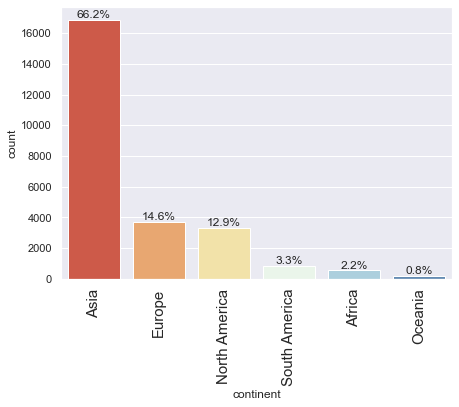

In [269]:
col = 'continent'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- Asia has about 66 percent of total applications.
- Europe and North America have about 14.6 and 13 percent of the total applications.

###### education_of_employee

 Plot for education_of_employee


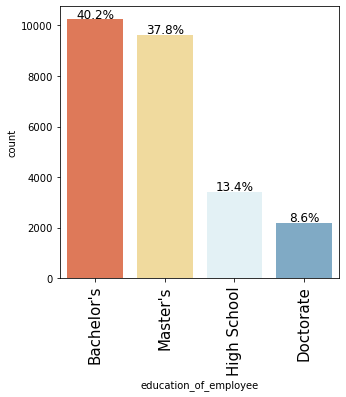

In [23]:
col = 'education_of_employee'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- Nearly 40% of the applicants have Bachelor's and about 39% of them have Masters.

###### has_job_experience

 Plot for has_job_experience


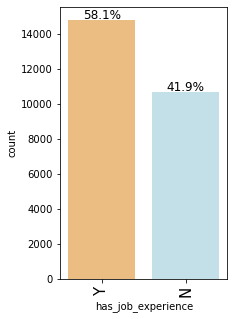

In [24]:
col = 'has_job_experience'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- 58% of the applicants for visa have job experience.

###### requires_job_training

 Plot for requires_job_training


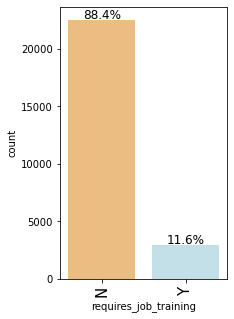

In [25]:
col = 'requires_job_training'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- 88% of then don't need job training.

###### region_of_employment

 Plot for region_of_employment


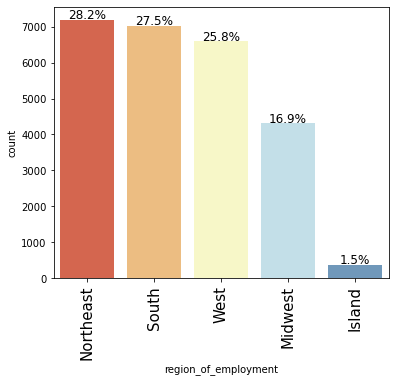

In [26]:
col = 'region_of_employment'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

-  The intended region of employment is almost equally distributed for Northeast, South, and West with 28%, 27.5% and 25.8%.

###### full_time_position

 Plot for full_time_position


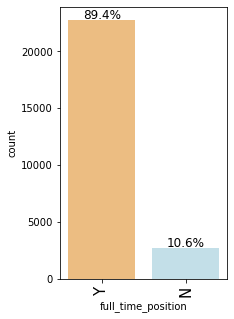

In [27]:
col = 'full_time_position'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- Almost 89% of the applicants, apply for full time positions.

###### case_status

 Plot for case_status


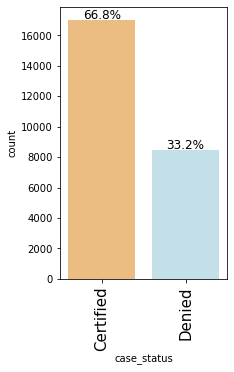

In [28]:
col = 'case_status'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- 66.8% of the applicants are successful in getting the Visa.

###### unit_of_wage

 Plot for unit_of_wage


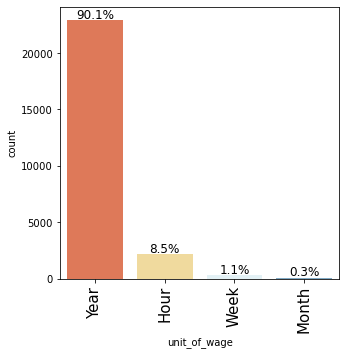

In [29]:
col = 'unit_of_wage'
print(' Plot for {}'.format(col))
labeled_barplot(data, col, True) 

- Most of the job positions prevailing_wage are expressed in years.

#### EDA for Numeric columns

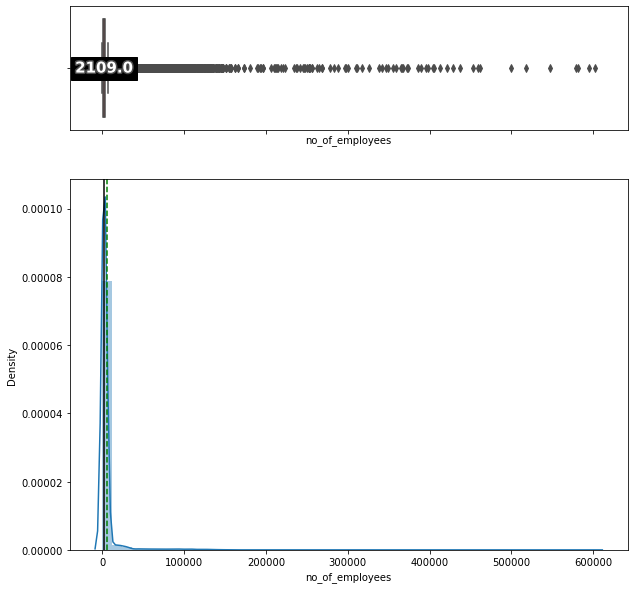

In [30]:
# Let's visualize the data for ['no_of_employees']
columns =  ['no_of_employees']
for col in columns:
    box_and_histogram(data[col])

- Most of the companies have aroung 2000+ employess and there are many outliers

In [94]:
data[data['no_of_employees'] <=0 ]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


- Later we will remove the columns with negative no of employees

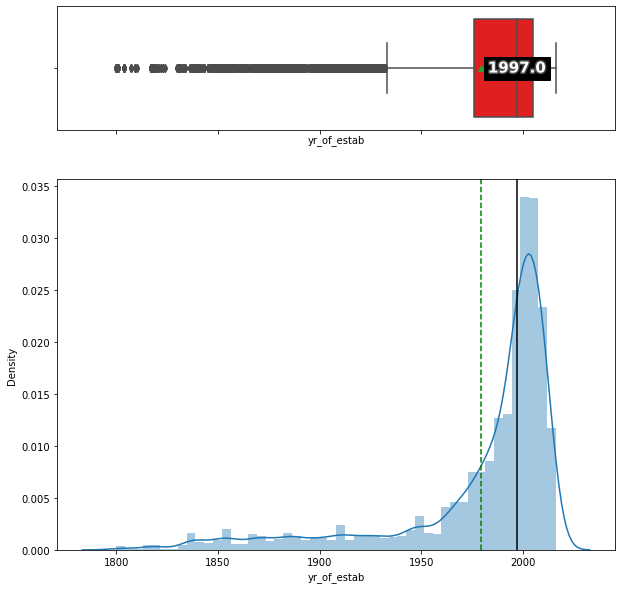

In [32]:
# Let's visualize the data for ['no_of_employees']
columns =  ['yr_of_estab']
for col in columns:
    box_and_histogram(data[col])

- Most of the companies have been established after 1990s.

## Bivariate Analysis

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    colors = {'Denied':'red', 'Certified':'green'}
    
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 10),  color=colors)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    

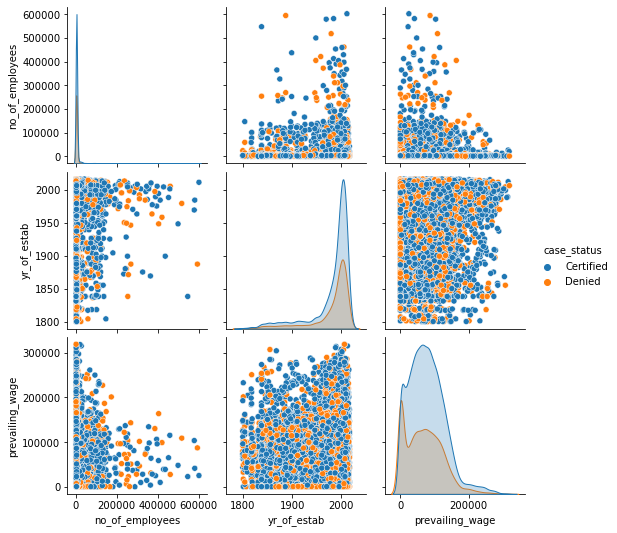

In [34]:
#numeric_cols = list(data.select_dtypes(exclude=['object']).columns)

sns.pairplot(data, hue="case_status")
plt.show()

#### continent Vs case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


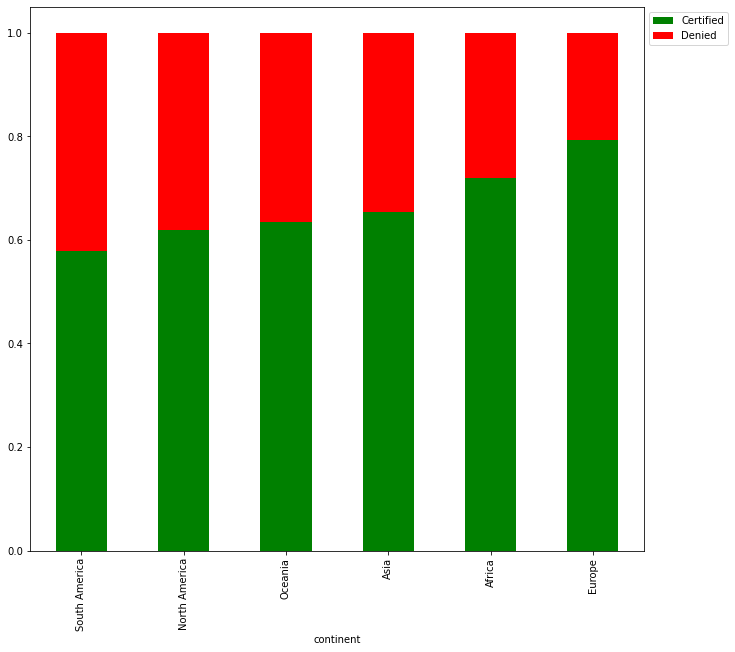

In [35]:
stacked_barplot(data, "continent", "case_status")

- Applicants from Europe have the highest rate of approval for Visa.
- South America have the least rate of approval.

#### education_of_employee Vs case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


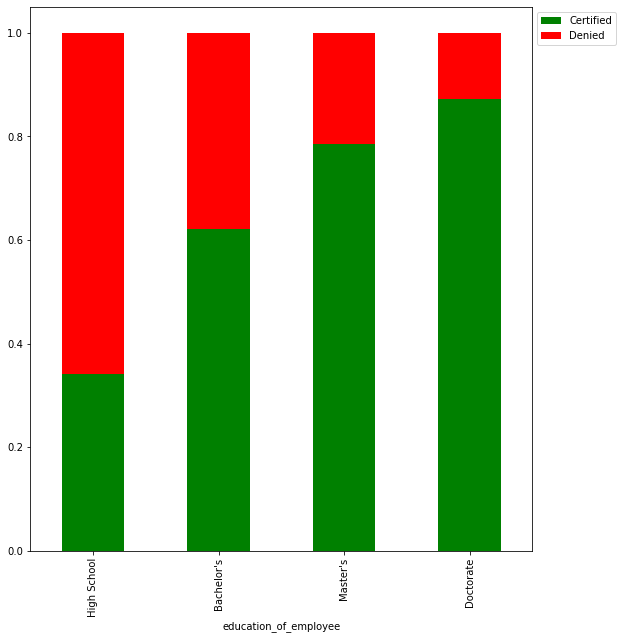

In [36]:
stacked_barplot(data, "education_of_employee", "case_status")

- Higher the education of the applicant the higher the chance of approval.
- Doctorate's have almost 90% approval and Master's have roughly 80% approval rate.

#### has_job_experience Vs case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


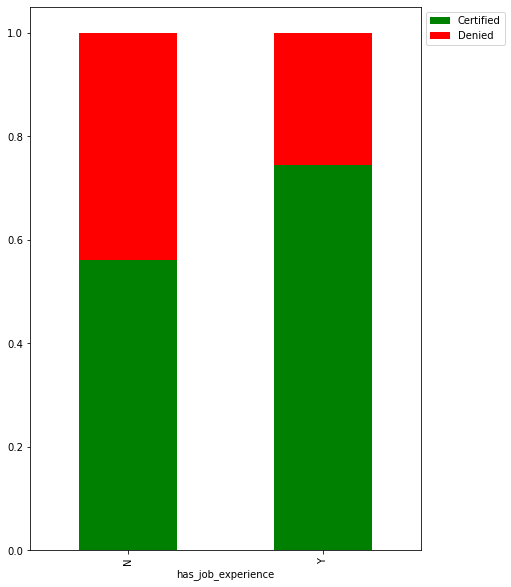

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

- Employees having prior job experience have higher rate of approval.

#### requires_job_training Vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


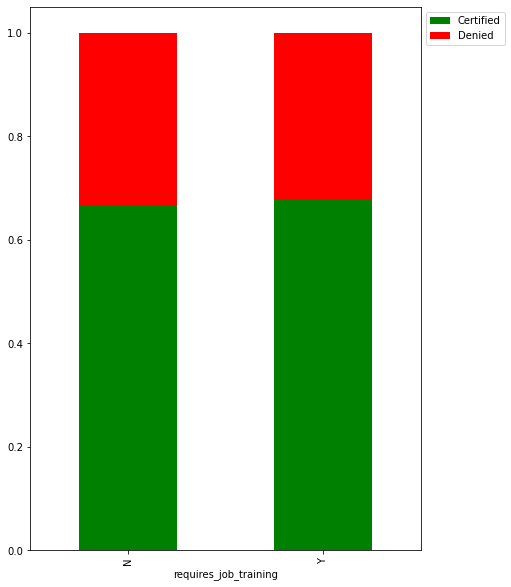

In [38]:
stacked_barplot(data, "requires_job_training", "case_status")

- Requirement for employee's Job training does not seem to be impacting the Visa application status.

#### region_of_employment Vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


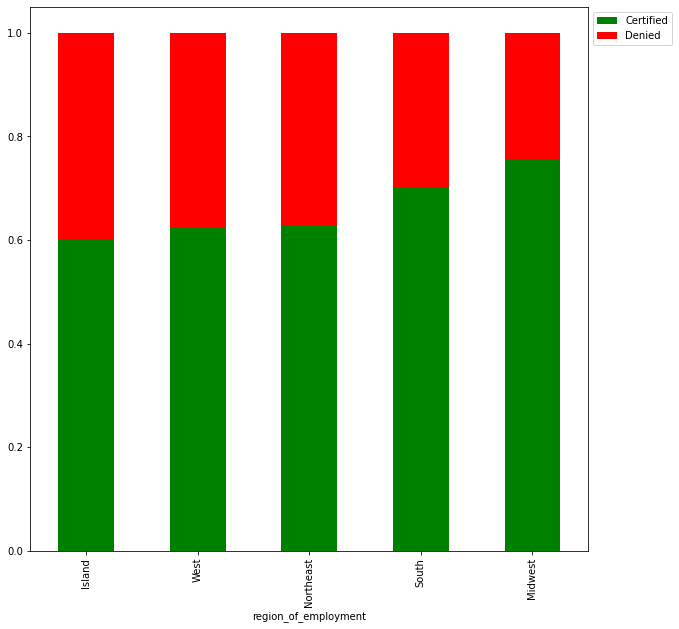

In [39]:
stacked_barplot(data, "region_of_employment", "case_status")

- Midwest has the higher rate of Visa approval.
- The region of intended employment does not seem to impact much, all regions have almost similar rate of approval.

#### full_time_position Vs case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


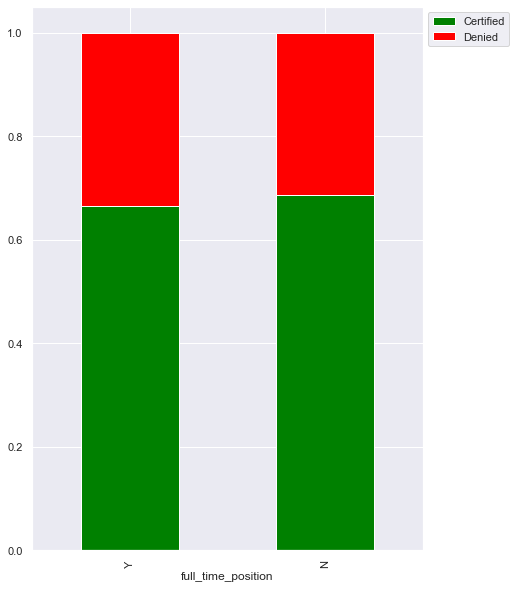

In [113]:
stacked_barplot(data, "full_time_position", "case_status")

- Full time or part time nature of the work does not appear to impact the case status.

#### unit_of_wage Vs case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


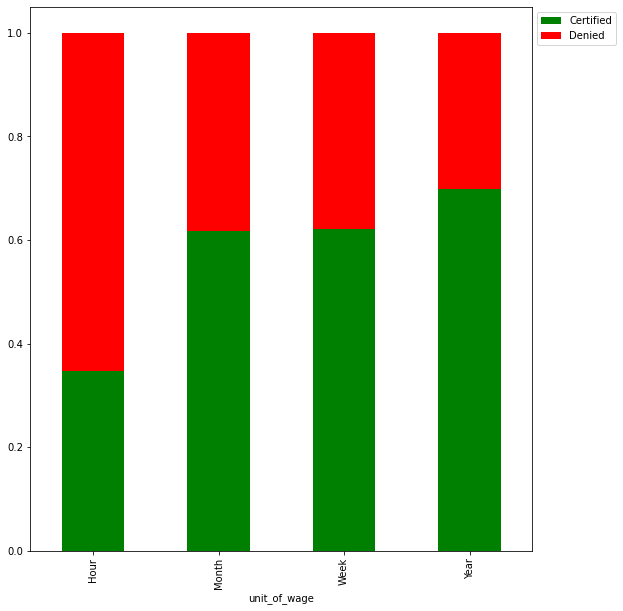

In [41]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Applicants who have the unit_of_wage for prevailing_wage as year have the better chance of approval.

#### continent Vs requires_job_training Vs case_status

<Figure size 1800x720 with 0 Axes>

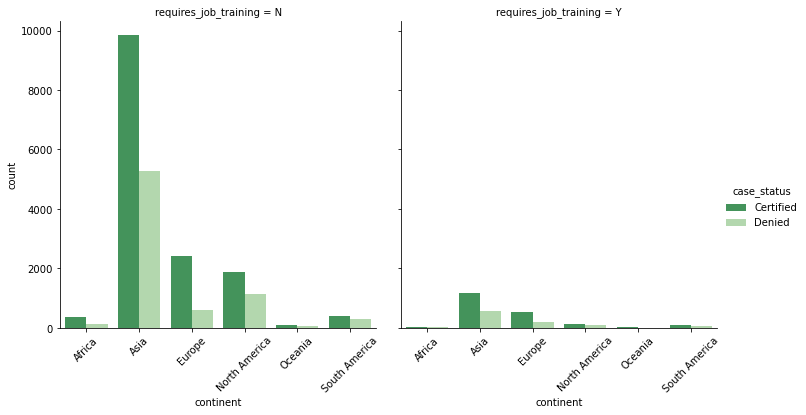

In [42]:
plt.figure(figsize=(25,10))

chart = sns.catplot(x='continent',
             col='requires_job_training', 
             data=data,
             hue='case_status',
             kind="count",
             palette ='Greens_r');
chart.set_xticklabels(rotation=45);

- Asia appears to widely approved Visa category, but there could be other factors like education

In [124]:
# get education by continent
pd.crosstab(data['continent'], data['education_of_employee'], margins=True).sort_values(
        by=sorter, ascending=False)

education_of_employee,Bachelor's,Doctorate,High School,Master's,All
continent,,,,,
All,10234,2192,3420,9634,25480
Asia,7168,923,2290,6480,16861
Europe,1299,846,490,1097,3732
North America,1225,258,401,1408,3292
South America,333,89,137,293,852
Africa,143,54,66,288,551
Oceania,66,22,36,68,192


- Asia and Europe have almost equal number of employees who are Doctorates.

#### continent Vs education_of_employee Vs case_status

<Figure size 3240x720 with 0 Axes>

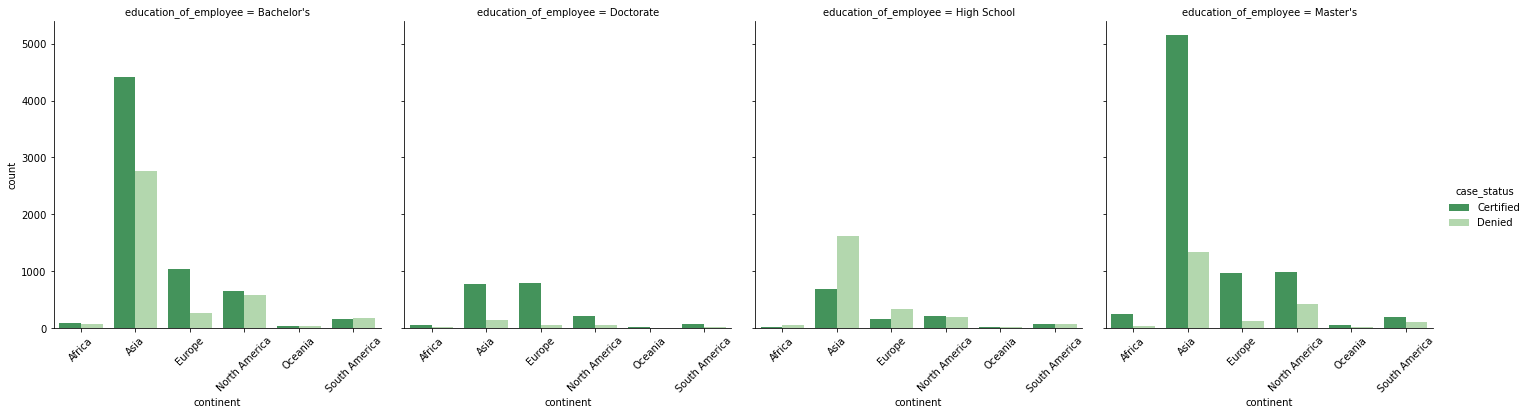

In [43]:
plt.figure(figsize=(45,10))

chart = sns.catplot(x='continent',
             col='education_of_employee', 
             data=data,
             hue='case_status',
             kind="count",
             palette ='Greens_r');
chart.set_xticklabels(rotation=45)

- Applicants with HighSchool have the lesser rate of approval

#### no_of_employees Vs yr_of_estab Vs case_status

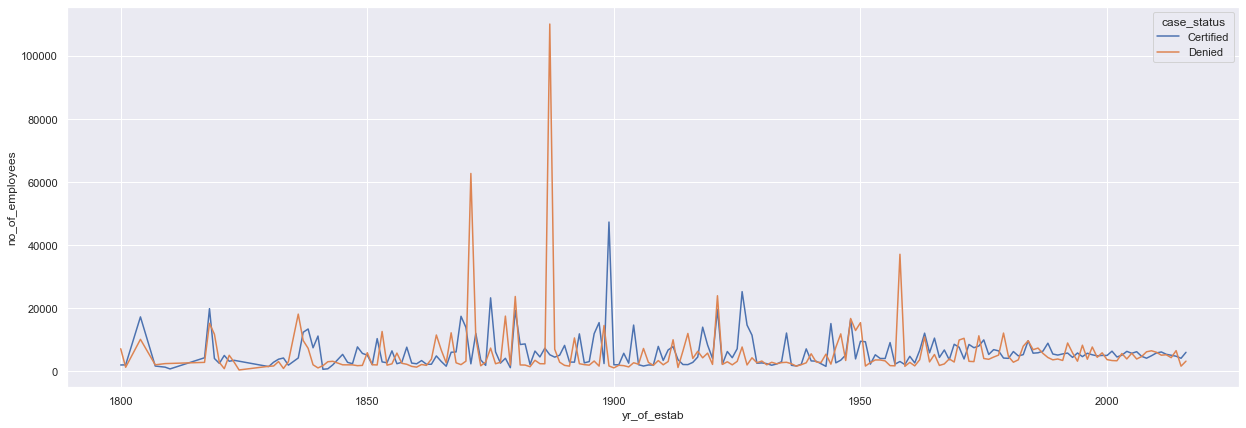

In [44]:
sns.set(rc={'figure.figsize':(21,7)})
sns.lineplot(y=data['no_of_employees'], x=data['yr_of_estab'], hue=data['case_status'], ci=None);

- There appears to be few outliers but otherwise the case_status aligns with the no of employees.

#### has_job_experience Vs education_of_employee Vs case_status

<Figure size 1080x1080 with 0 Axes>

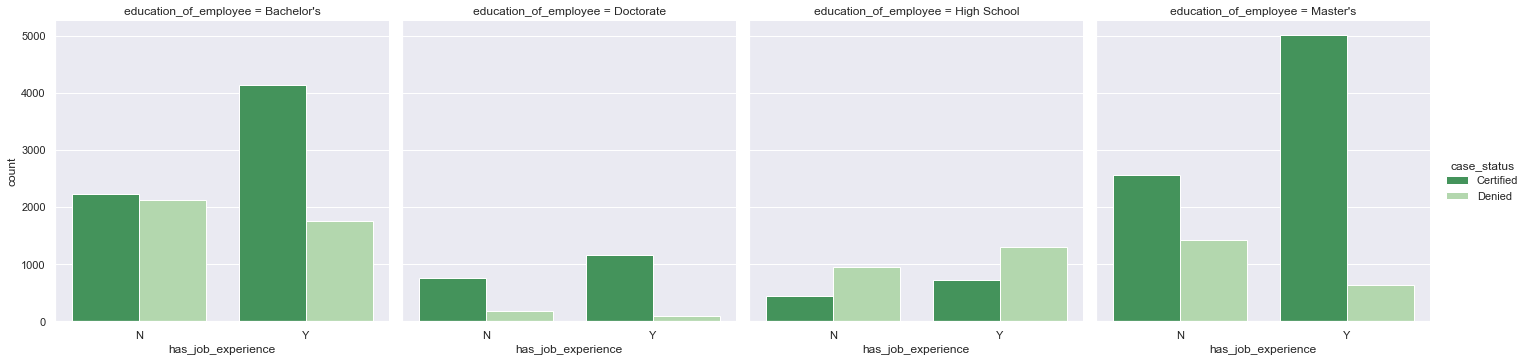

In [45]:
plt.figure(figsize=(15,15))
sns.catplot(x='has_job_experience',
             col='education_of_employee', 
             data=data,
             hue='case_status',
             kind="count",
             palette ='Greens_r');

- Job experience seems to be a deciding factor for all education level except for Doctorate.

#### unit_of_wage Vs prevailing_wage Vs case_status

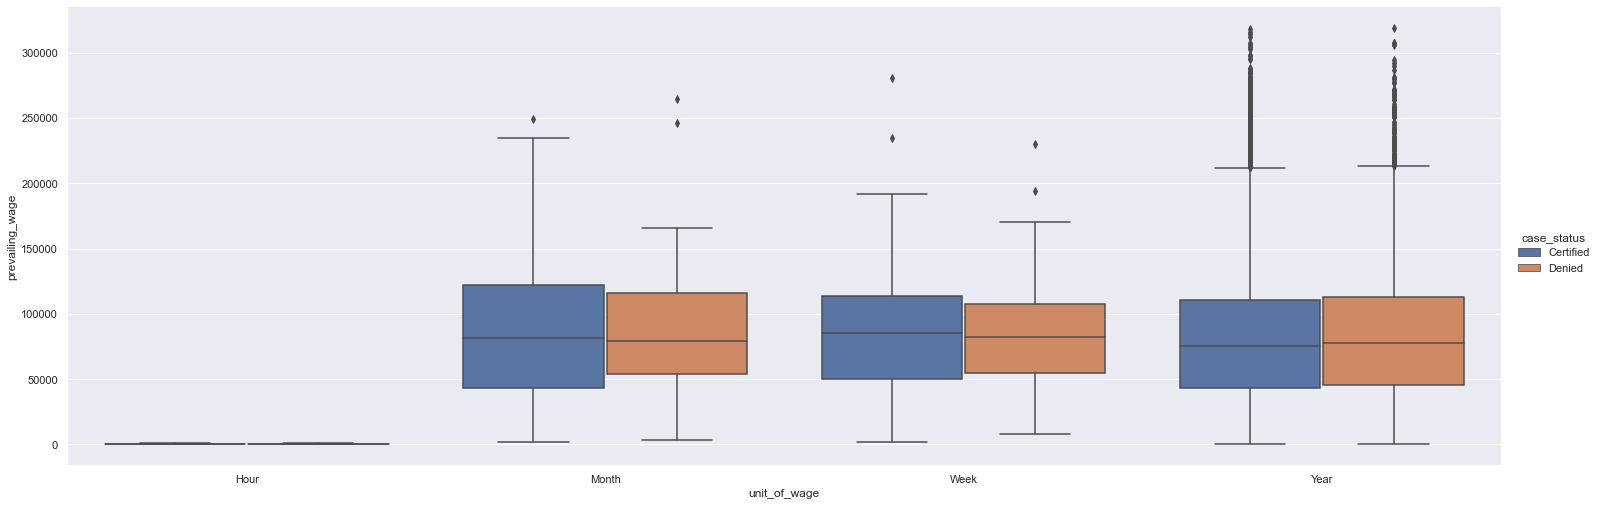

In [48]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="unit_of_wage", y="prevailing_wage", kind="box", data=data,hue='case_status', height=7, aspect=3);

- Among the wage groups the wage does not seem to be deciding factor

#### no_of_employees Vs yr_of_estab Vs case_status for  unit_of_wage is Hourly

In [127]:
df_hourly = data[ data['unit_of_wage'] == 'Hour']

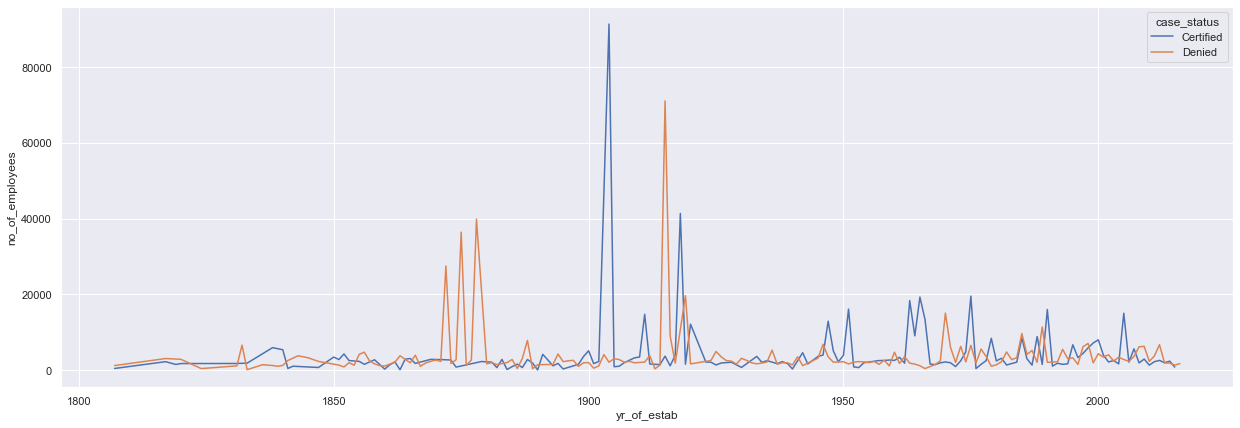

In [128]:
sns.set(rc={'figure.figsize':(21,7)})
sns.lineplot(y=df_hourly['no_of_employees'], x=df_hourly['yr_of_estab'], hue=df_hourly['case_status'], ci=None);

- There appears to be few outliers but otherwise the case_status aligns with the no of employees, and occasionally the approval seems to be higher

In [129]:
#### no_of_employees Vs yr_of_estab Vs case_status for  unit_of_wage is Weekly

In [130]:
df_weekly = data[ data['unit_of_wage'] == 'Week']

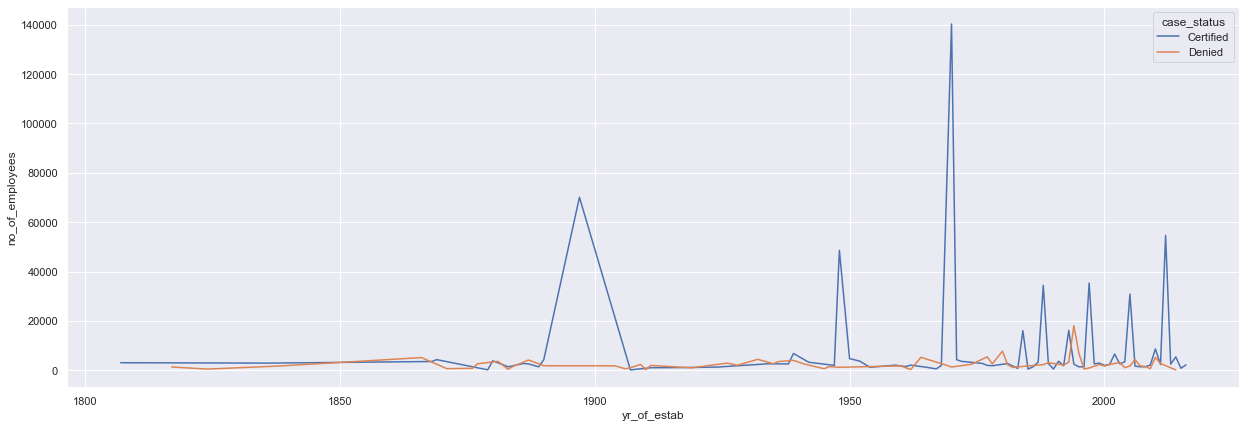

In [131]:
sns.set(rc={'figure.figsize':(21,7)})
sns.lineplot(y=df_weekly['no_of_employees'], x=df_weekly['yr_of_estab'], hue=df_weekly['case_status'], ci=None);

- There appears to be few outliers but otherwise the case_status aligns with the no of employees, and occasionally the approval seems to be higher

#### no_of_employees Vs yr_of_estab Vs case_status for  unit_of_wage is Monthly

In [134]:
df_monthly = data[ data['unit_of_wage'] == 'Month']

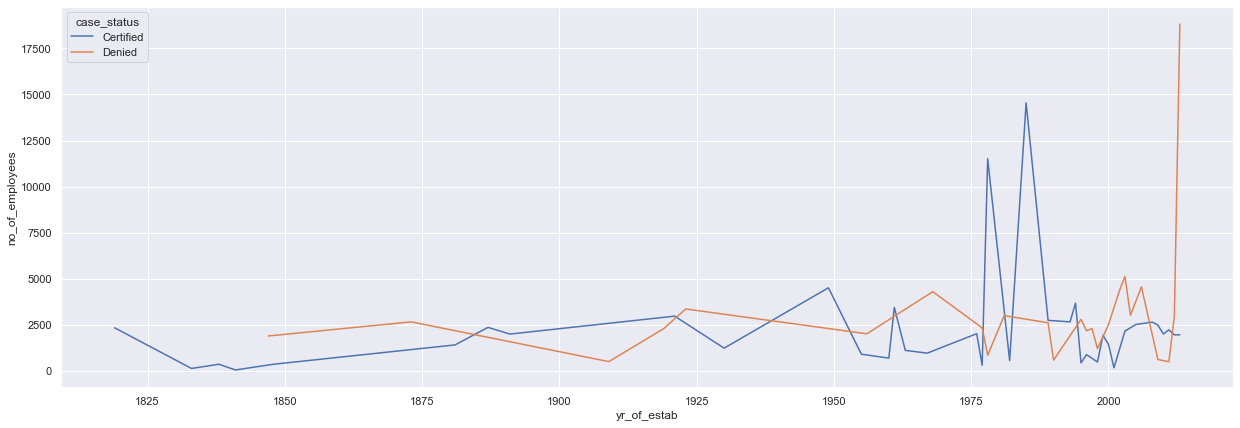

In [135]:
sns.set(rc={'figure.figsize':(21,7)})
sns.lineplot(y=df_monthly['no_of_employees'], x=df_monthly['yr_of_estab'], hue=df_monthly['case_status'], ci=None);

- The pattern is different from weekly and hourly wage payments

#### no_of_employees Vs yr_of_estab Vs case_status for  unit_of_wage is Yearly

In [138]:
df_yearly = data[ data['unit_of_wage'] == 'Year']

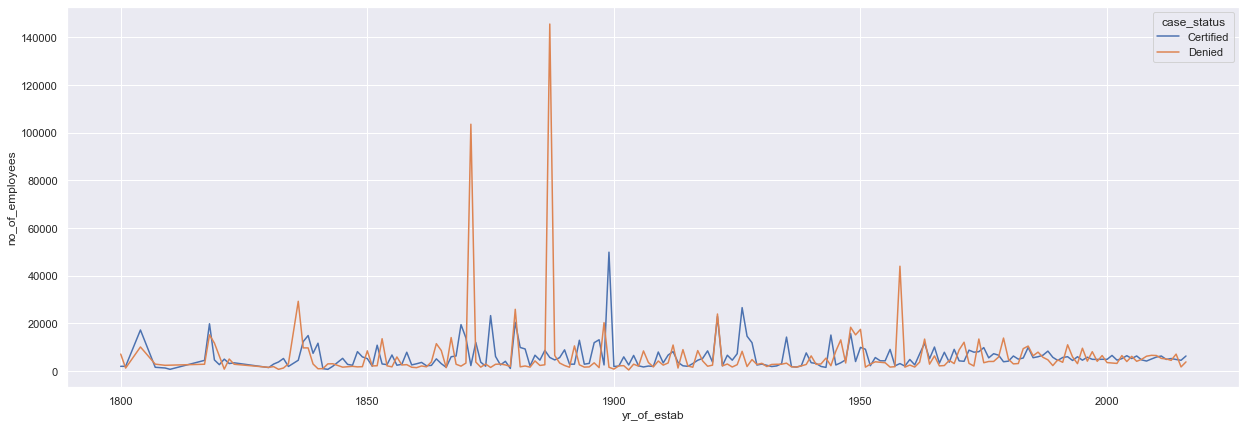

In [139]:
sns.set(rc={'figure.figsize':(21,7)})
sns.lineplot(y=df_yearly['no_of_employees'], x=df_yearly['yr_of_estab'], hue=df_yearly['case_status'], ci=None);

- There appears to be few outliers but otherwise the case_status aligns with the no of employees.

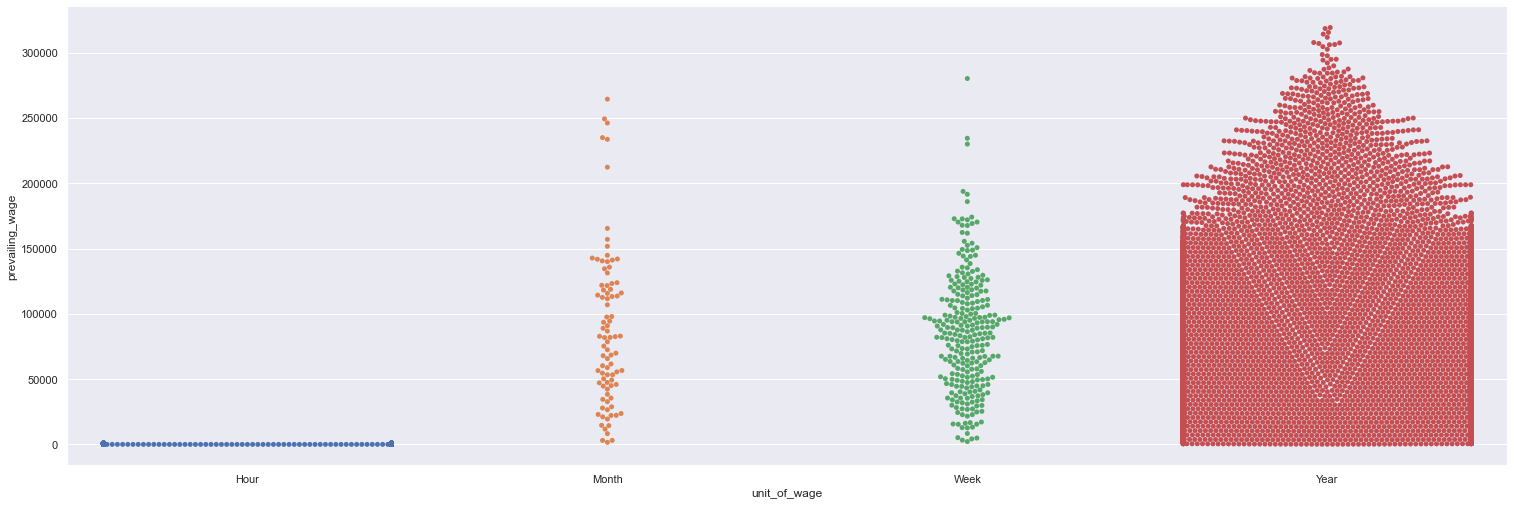

In [140]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="unit_of_wage", y="prevailing_wage", kind="swarm", data=data, height=7, aspect=3);

- Pay unit of yearly is the most popular among employees

#### Wage

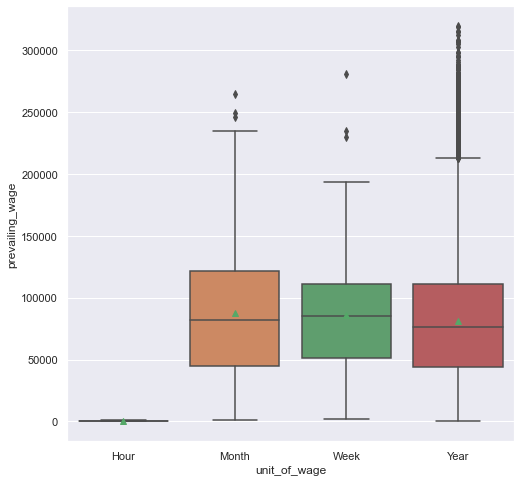

In [52]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'unit_of_wage', y = 'prevailing_wage', showmeans = True, data = data)
plt.show()

- There are many outliers where the unit of wage is yearly
- The average of wage among montly, weekly and yearly is almost the same, the exception bgeing hourly payments

### Observations

- The region of intended employment does not seem to impact much, all regions have almost similar rate of approval.
- Full time or part time nature of the work does not appear to impact the case status.
- Applicants who have the unit_of_wage for prevailing_wage as year have the better chance of approval.
- Asia and Europe have almost equal number of employees who are Doctorates.
- Job experience seems to be a deciding factor for all education level except for Doctorate.

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

- Yes employees with higher education have better rate of approval. Especially with Doctorate.

2. How does the visa status vary across different continents? 
- Yes Europe seems to have higher level of approvals, this is also due to higher level of education among Europe applicants.
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
- Yes to some extent job experience influences visa status but not at a very high level as education.
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
- Year to be the most approved, with hourly being least approved, but weekly and monthly too have good rates of approval.
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
- Prevailing wage does not seem to appear impacting the visa status

## Data Preprocessing

- Outlier detection and treatment (if needed)
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Preparing data for modeling 

### Outlier detection

- As classification models are better in hadling outliers, we will proceed without outlier handling

### Preparing data for modeling 

- Add weekend_only attribute

- WeekDay booking are more likely to be cancelled

### Feature engineering

- Convert case_status, has_job_experience, requires_job_training and full_time_position to boolean

In [57]:
# make  a copy
data_m = data.copy()

# Set y variable to 1 and 0
data_m['case_status'] = np.where(data_m['case_status']=='Certified', 1, 0)

In [58]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  object  
 4   requires_job_training  25480 non-null  object  
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  object  
 11  case_status            25480 non-null  int32   
dtypes: category(4), float64(1), int32(1), int64(2), object(4)
memory usage: 1.6+ MB


#### Convert object columns 

In [59]:
data_m['has_job_experience'] = np.where(data_m['has_job_experience']=='Y', 1, 0)
data_m['requires_job_training'] = np.where(data_m['requires_job_training']=='Y', 1, 0)
data_m['full_time_position'] = np.where(data_m['full_time_position']=='Y', 1, 0)


#### Let's drop case_id

In [60]:
# Let's drop case_id
data_m = data_m.drop('case_id', axis =1)

In [61]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data_m,
    columns=[
        'continent',
        'education_of_employee',
        'region_of_employment',
        'unit_of_wage'
    ],
    drop_first=True,
)
dummy_data.head(10)

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,2412,2002,83425.6500,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,1,44444,2008,122996.8600,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,98,1897,83434.0300,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1082,2005,149907.3900,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
5,1,0,2339,2012,78252.1400,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
6,0,0,4985,1994,53635.3900,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,1,0,3035,1924,418.2298,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,4810,2012,74362.1900,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,1,0,2251,1995,67514.7600,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [62]:
dummy_data.shape

(25480, 22)

#### Since  case id is removed lets check for duplicates

In [63]:
dummy_data[dummy_data.duplicated()].count()

has_job_experience                   0
requires_job_training                0
no_of_employees                      0
yr_of_estab                          0
prevailing_wage                      0
full_time_position                   0
case_status                          0
continent_Asia                       0
continent_Europe                     0
continent_North America              0
continent_Oceania                    0
continent_South America              0
education_of_employee_Doctorate      0
education_of_employee_High School    0
education_of_employee_Master's       0
region_of_employment_Midwest         0
region_of_employment_Northeast       0
region_of_employment_South           0
region_of_employment_West            0
unit_of_wage_Month                   0
unit_of_wage_Week                    0
unit_of_wage_Year                    0
dtype: int64

#### Let us remove the  rows with negative no_of_employees

In [64]:
dummy_data = dummy_data[dummy_data['no_of_employees'] >= 0]

In [65]:
dummy_data.shape

(25447, 22)

In [66]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25447 non-null  int32  
 1   requires_job_training              25447 non-null  int32  
 2   no_of_employees                    25447 non-null  int64  
 3   yr_of_estab                        25447 non-null  int64  
 4   prevailing_wage                    25447 non-null  float64
 5   full_time_position                 25447 non-null  int32  
 6   case_status                        25447 non-null  int32  
 7   continent_Asia                     25447 non-null  uint8  
 8   continent_Europe                   25447 non-null  uint8  
 9   continent_North America            25447 non-null  uint8  
 10  continent_Oceania                  25447 non-null  uint8  
 11  continent_South America            25447 non-null  uin

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting an employee's Visa will *not* be Certified but in reality will be Certified- Loss of potential talent ( opportunity cost)
2. Predicting an employee's Visa will *be* Certified but in reality will *not* be Certified - Loss of resources


### Which Loss is greater ? 
* Loss of potential talent ( opportunity cost) is nigher a skilled talent is hard to find.
* Loss of resources is not a heavy burden as the application can be filtered in further processing.

### How to reduce this loss i.e need to reduce False Negatives ?

* Model should reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

### Positive event and Negative Event
* Positive event is Visa certified
* Negative event is Visa is rejected

### Data Preparation

In [67]:
dummy_data.shape

(25447, 22)

In [68]:
final_data_for_model = dummy_data.copy()

In [69]:
final_data_for_model.shape

(25447, 22)

In [70]:
X = final_data_for_model.drop("case_status", axis=1)  # Features
y = final_data_for_model["case_status"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [71]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17812, 21) (7635, 21)
(17812,) (7635,)


In [72]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 17812
Number of rows in test data = 7635


In [73]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.666798
0    0.333202
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.67112
0    0.32888
Name: case_status, dtype: float64


**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [74]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [75]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")

## Model Building - Bagging

###  Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.658808  0.737119   0.750149  0.743577


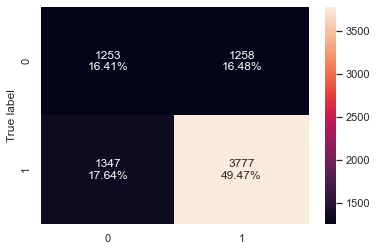

In [219]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data as there is a considerable difference between training and test scores for all the metrics.
* The test recall is 73%. We can see if other models have better recall

### Random Forest

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.727832  0.840554   0.773527  0.805649


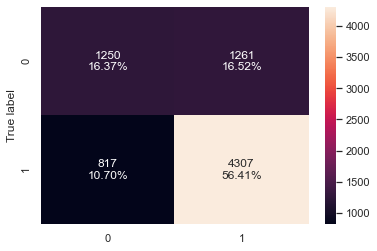

In [77]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* The decision tree is overfitting the training data as there is a considerable difference between training and test scores for all the metrics.
* The test recall is 84%. Its a good improvement from decision tree

### Bagging classifier

In [78]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [147]:
#get accuracy, recall, precision and F1 
bagging_estimator_train_score=model_performance_classification_sklearn(bagging_estimator,X_train,y_train)
print("Training performance:\n",bagging_estimator_train_score)
bagging_estimator_test_score=model_performance_classification_sklearn(bagging_estimator,X_test,y_test)
print("Test performance:\n",bagging_estimator_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.986021  0.987792   0.991213  0.989499
Test performance:
    Accuracy    Recall  Precision        F1
0  0.703733  0.778689   0.779601  0.779145


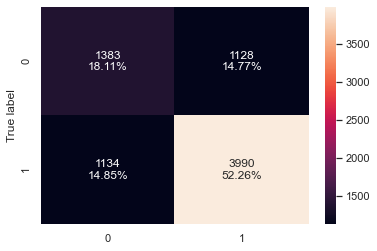

In [80]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

* The Bagging classifier is overfitting the training data as there is a considerable difference between training and test scores for all the metrics.
* The test recall is 77%. A slight improvement form the descision tree

### Checking the feature importance - Decision Tree 

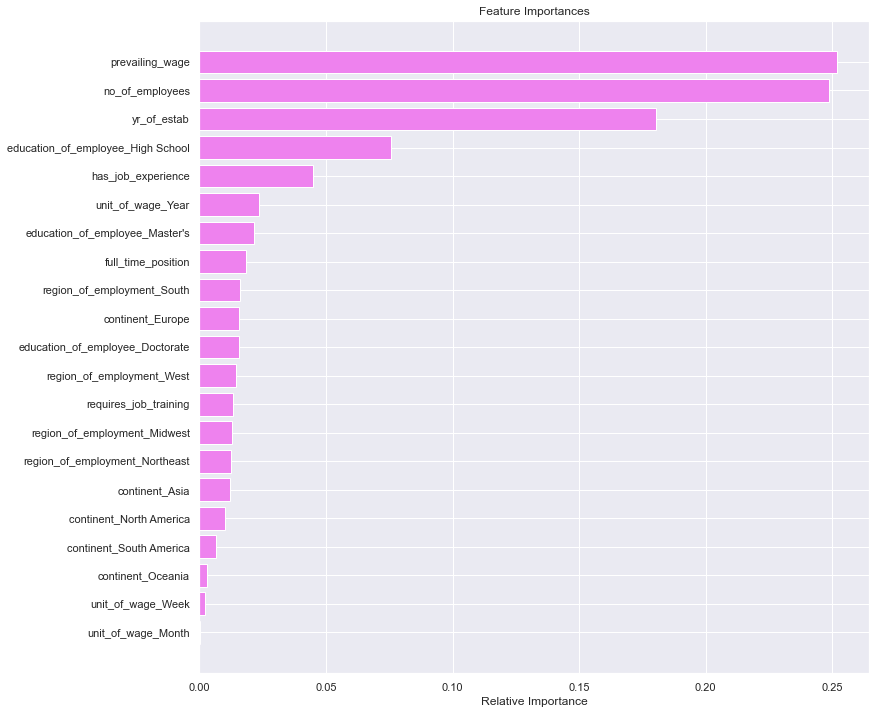

In [143]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Checking the feature importance - Random Forest 

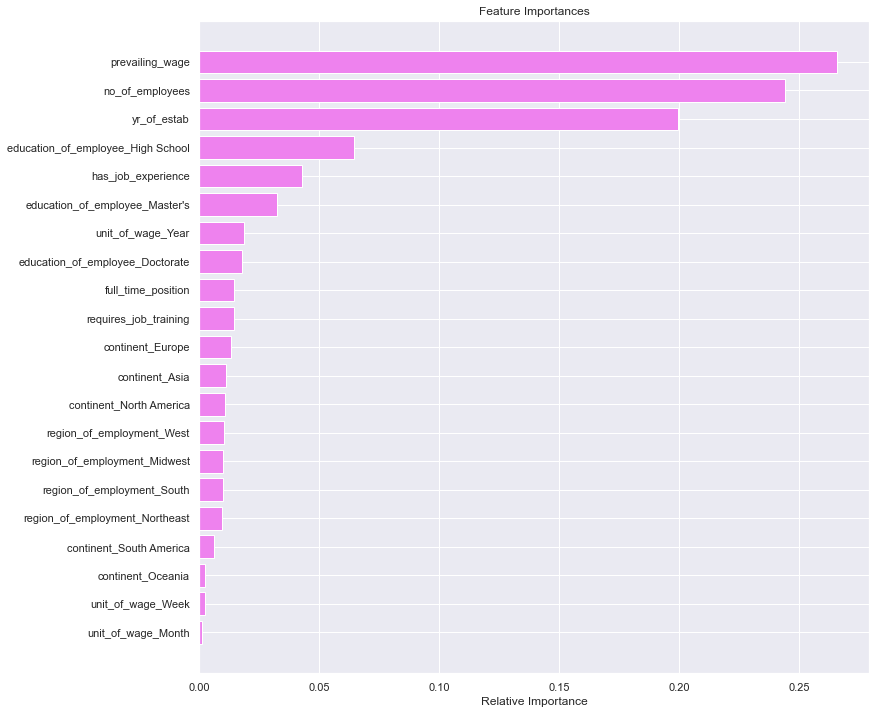

In [145]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- For both Decision Tree and Random Forest prevailing_wage and no_of_employees are the important features

## Model Improvement - Bagging

### Tuning Decision Tree

In [81]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       min_samples_leaf=5, random_state=1)

In [155]:
#get accuracy, recall, precision and F1 
dtree_estimator_tuned_train_score = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_tuned_train_score)
dtree_estimator_tuned_test_score =model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Test performance:\n",dtree_estimator_tuned_test_score)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.666798     1.0   0.666798  0.800094
Test performance:
    Accuracy  Recall  Precision        F1
0   0.67112     1.0    0.67112  0.803198


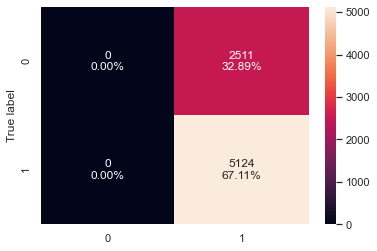

In [196]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

- The decision tree is now more generalized model with consistent results for testing and training data
- The model has a very high recall score, but the precision is only about 66 to 67%.
- The model is biased and one side.

### Let's try using class_weights 

- The classes are imbalanced with 66% certified and 33% denied. 

- We should make the model aware that the class of interest here is 'certified'.

- We can do so by passing the parameter `class_weights` available for the model. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.665,1:0.335} because that is the original imbalance in our data.

### Tuninig Decision Tree with calls weights

In [96]:
#Choose the type of classifier. 
dtree_estimator_weight = DecisionTreeClassifier(class_weight={0:0.665,1:0.335},random_state=1)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_weight, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_weight = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.665, 1: 0.335}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       min_samples_leaf=5, random_state=1)

In [157]:
#get accuracy, recall, precision and F1 
dtree_estimator_weighted_tuned_train_score = model_performance_classification_sklearn(dtree_estimator_weight,X_train,y_train)
print("Training performance:\n",dtree_estimator_weighted_tuned_train_score)
dtree_estimator_weighted_tuned_test_score =model_performance_classification_sklearn(dtree_estimator_weight,X_test,y_test)
print("Test performance:\n",dtree_estimator_weighted_tuned_test_score)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.666798     1.0   0.666798  0.800094
Test performance:
    Accuracy  Recall  Precision        F1
0   0.67112     1.0    0.67112  0.803198


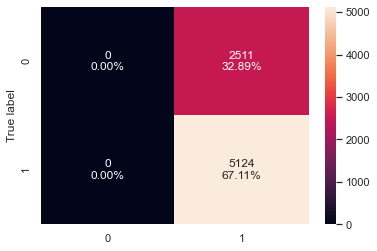

In [195]:
confusion_matrix_sklearn(dtree_estimator_weight, X_test, y_test)

- The decision tree is now more generalised model with consistent resutls for testing and trainig data
- The model has a very hing recall score, but the perscison is only about 66 to 67%.
- This is similar to the tuned Decision Tree without the weight
- The model seems to calssify all the data to one side.

### Random Forest - Tuning

In [83]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=9,
                       n_estimators=150, random_state=1)

In [159]:
#get accuracy, recall, precision and F1 
rf_estimator_tuned_train_score=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",rf_estimator_tuned_train_score)
rf_estimator_tuned_test_score=model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test)
print("Test performance:\n",rf_estimator_tuned_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758534  0.893407   0.777591  0.831485
Test performance:
    Accuracy    Recall  Precision        F1
0  0.755861  0.893638   0.776365  0.830884


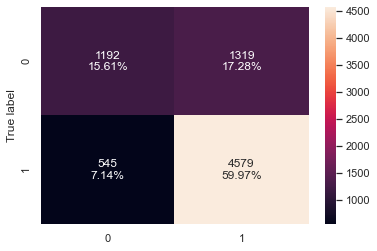

In [199]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

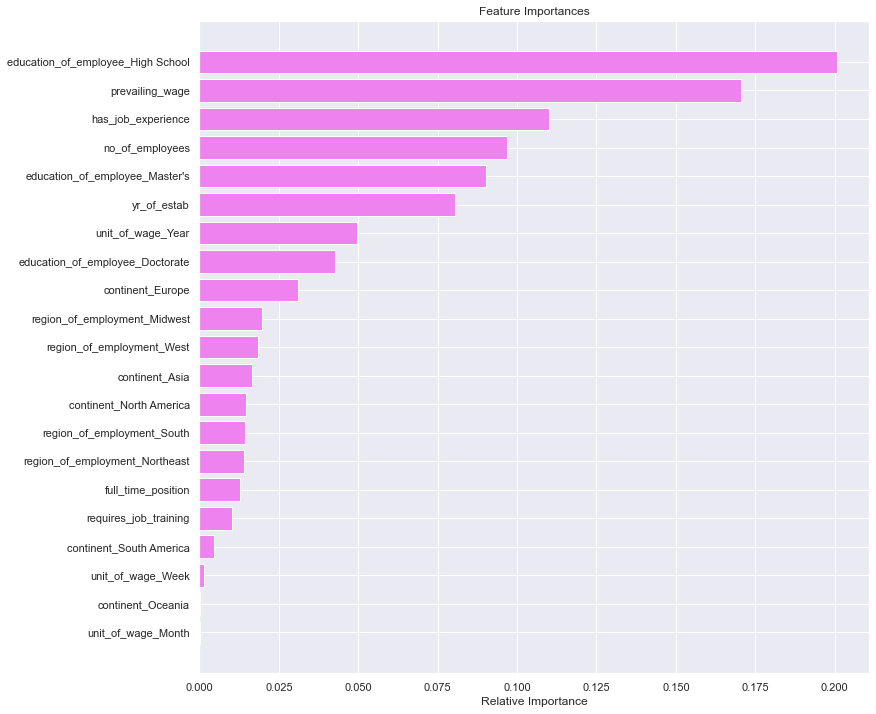

In [200]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The Tuned Random Forest model is giving generalized results between training and test
- The model has acceptable recall and precision scores

**Random forest with class weights**

In [97]:
# Choose the type of classifier. 
rf_tuned_weight = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned_weight, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned_weight = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned_weight.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_features=0.6, max_samples=0.7,
                       min_impurity_decrease=0.01, n_estimators=30,
                       random_state=1)

In [164]:
#get accuracy, recall, precision and F1 
rf_estimator_weight_tuned_train_score=model_performance_classification_sklearn(rf_tuned_weight,X_train,y_train)
print("Training performance:\n",rf_estimator_tuned_train_score)
rf_estimator_weight_tuned_test_score=model_performance_classification_sklearn(rf_tuned_weight,X_test,y_test)
print("Test performance:\n",rf_estimator_tuned_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758534  0.893407   0.777591  0.831485
Test performance:
    Accuracy    Recall  Precision        F1
0  0.755861  0.893638   0.776365  0.830884


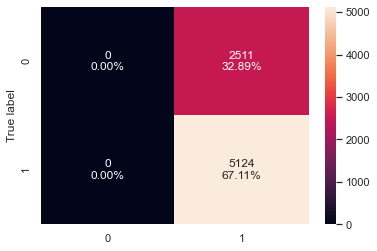

In [165]:
confusion_matrix_sklearn(rf_tuned_weight, X_test, y_test)

- The Tuned Random Forest model with weight is giving generalized results between training and test
- The model has acceptable recall and perscison scores, but the confusion matrix reveals that the model is one side.
- The Tuned Random Forest model without class weight is a better model now.

### Bagging classifier - Tuning

In [86]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, random_state=1)

In [167]:
#get accuracy, recall, precision and F1 
bagging_estimator_tuned_train_score=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_score)
bagging_estimator_tuned_test_score=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Test performance:\n",bagging_estimator_tuned_score)

Training performance:
    Accuracy  Recall  Precision        F1
0   0.67112     1.0    0.67112  0.803198
Test performance:
    Accuracy  Recall  Precision        F1
0   0.67112     1.0    0.67112  0.803198


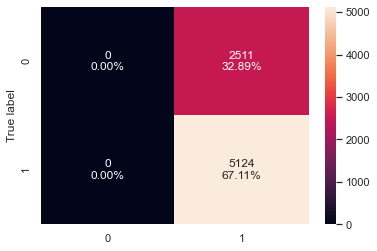

In [168]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

- The Bagging classifier is giving a generalized results now
- The model appears to predict one sided, the default bagging classifier appears to be more robust. 

- Of the bagging models, the Tuned Random Forest without specific class weights assigned is the better model so far

- The features of importance from best model so far is 
    education_of_employee_High School
    prevailing_wage
    has_job_experience

## Model Building - Boosting

### AdaBoost Classifier

In [170]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [177]:
#get accuracy, recall and precision on train and test set
abc_train_score=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance:\n",abc_train_score)
abc_test_score=model_performance_classification_sklearn(abc,X_test,y_test)
print("Test performance:\n",abc_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.735347  0.883135   0.759247  0.816519
Test performance:
    Accuracy    Recall  Precision        F1
0  0.740144  0.890906   0.762104  0.821486


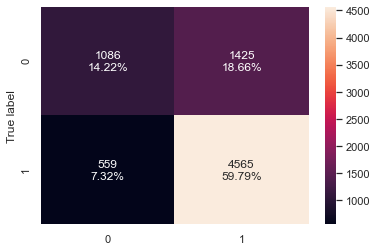

In [173]:
confusion_matrix_sklearn(abc, X_test, y_test)

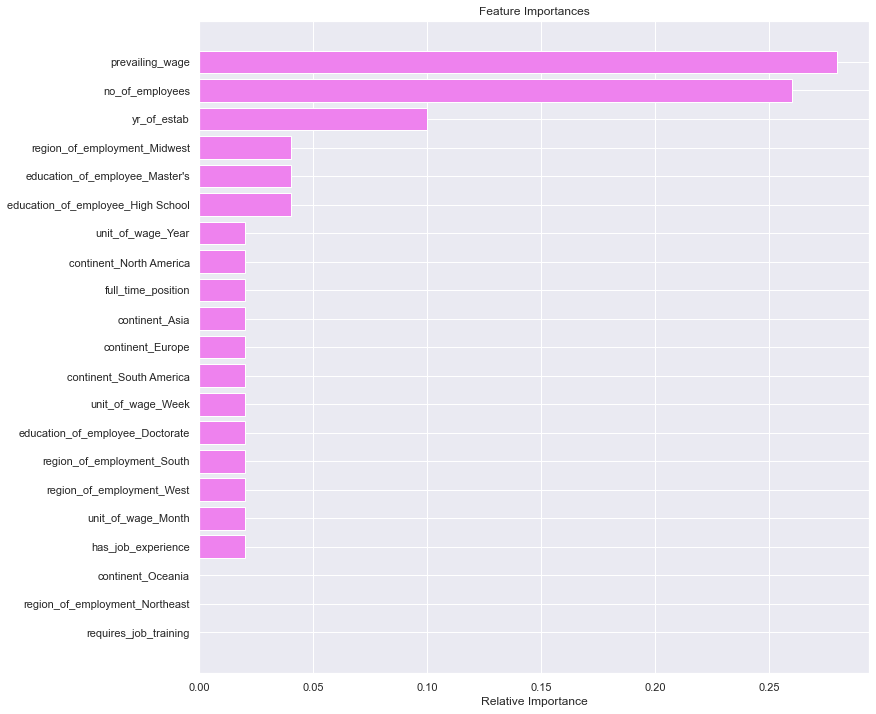

In [185]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Ada boost classifier is giving comparable results between training and test.
- Model performance is comparable to Tuned Random Forest.
- The importance feature for this model is prevailing_wage and no_of_employees.

### Gradient Boosting Classifier

In [174]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [179]:
#get accuracy, recall and precision on train and test set
gbc_train_score=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance:\n",gbc_train_score)
gbc_test_score=model_performance_classification_sklearn(gbc,X_test,y_test)
print("Test performance:\n",gbc_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755446  0.881031   0.780488  0.827717
Test performance:
    Accuracy    Recall  Precision        F1
0  0.753242  0.882514   0.779118  0.827599


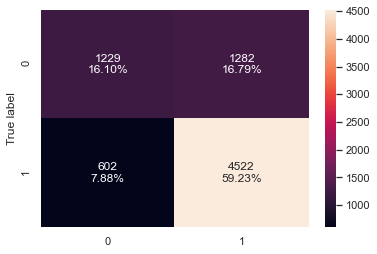

In [176]:
confusion_matrix_sklearn(gbc, X_test, y_test)

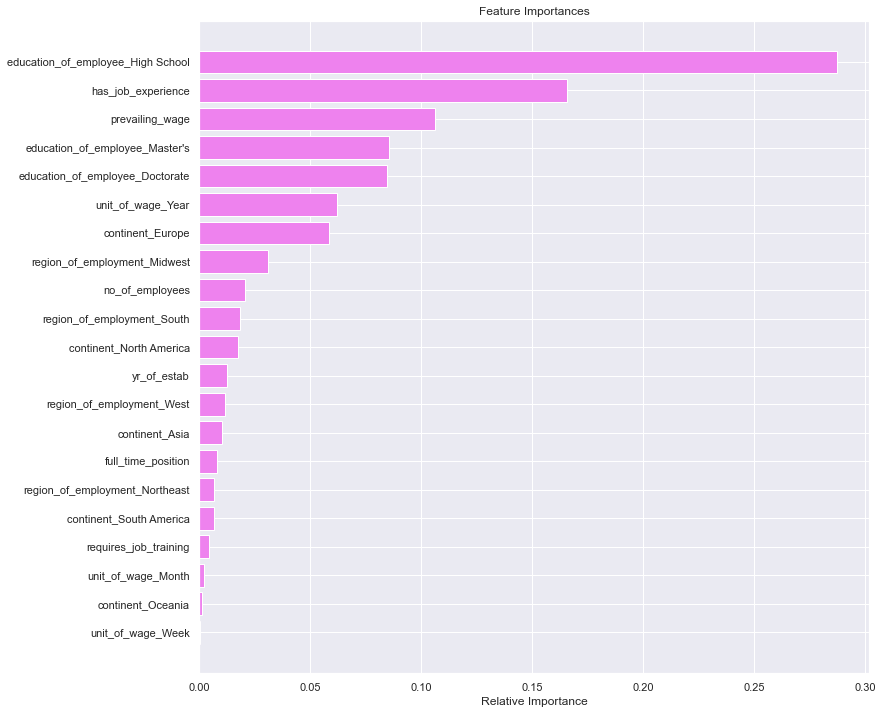

In [206]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Gradient  boost classifier is giving comparable results between training and test.
- Model performance is comparable to Tuned Random Forest.
- The importance feature for this model is education_of_employee_High School and has_job_experience.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [207]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [211]:
#get accuracy, recall and precision on train and test set
gbc_init_train_score=model_performance_classification_sklearn(gbc_init,X_train,y_train)
print("Training performance:\n",gbc_init_train_score)
gbc_init_test_score=model_performance_classification_sklearn(gbc_init,X_test,y_test)
print("Test performance:\n",gbc_init_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754716  0.880189   0.780149  0.827155
Test performance:
    Accuracy   Recall  Precision        F1
0  0.753635  0.88388   0.778848  0.828046


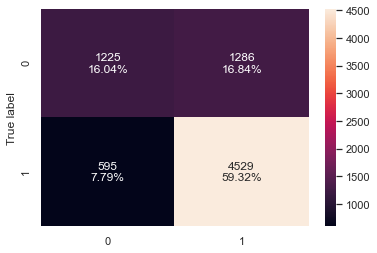

In [212]:
confusion_matrix_sklearn(gbc_init, X_test, y_test)

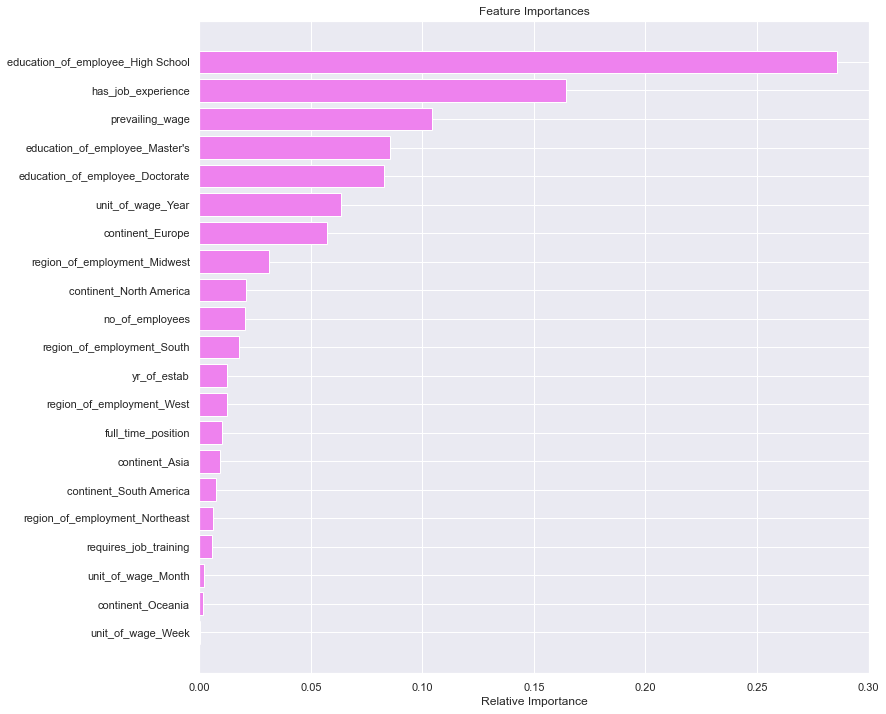

In [213]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Gradinet boost classifier with Ada boost is giving comparable results between training and test.
- Model performance is comparable to  Gradinet boost classifier with default.
- The importance feature for this model is education_of_employee_High School and has_job_experience.

### XGBoost Classifier

In [84]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [180]:
#get accuracy, recall and precision on train and test set
xgb_train_score=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_score)
xgb_test_score=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Test performance:\n",xgb_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738703  0.860265   0.775101  0.815466
Test performance:
    Accuracy    Recall  Precision        F1
0  0.738703  0.860265   0.775101  0.815466


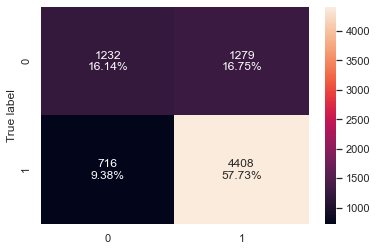

In [181]:
confusion_matrix_sklearn(xgb, X_test, y_test)

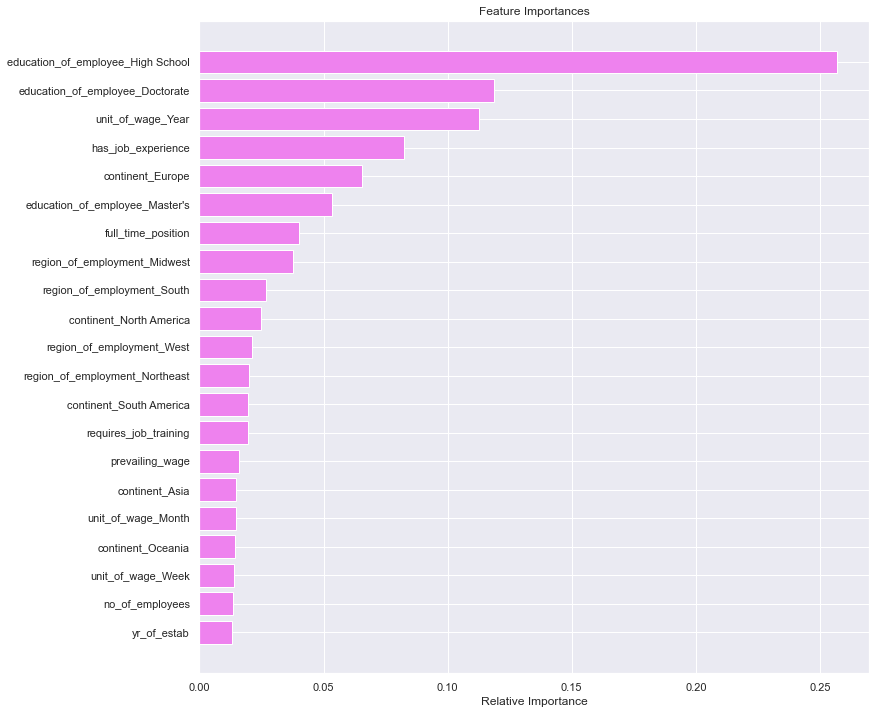

In [188]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- XG boost classifier is giving comparable results between training and test.
- Model performance is comparable to Ada boost, Gradinet boost and Tuned Random Forest.
- The importance feature for this model is education_of_employee_High School and education_of_employee_Doctorate.

## Hyperparameter Tuning

### AdaBoost Classifier Tuning

In [90]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

In [182]:
#get accuracy, recall and precision on train and test set
abc_tuned_train_score=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_train_score)
abc_tuned_test_score=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Test performance:\n",abc_tuned_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.691051  0.969437   0.691365  0.807122
Test performance:
    Accuracy    Recall  Precision        F1
0  0.692338  0.973458   0.692682  0.809412


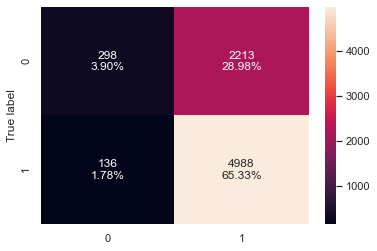

In [183]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

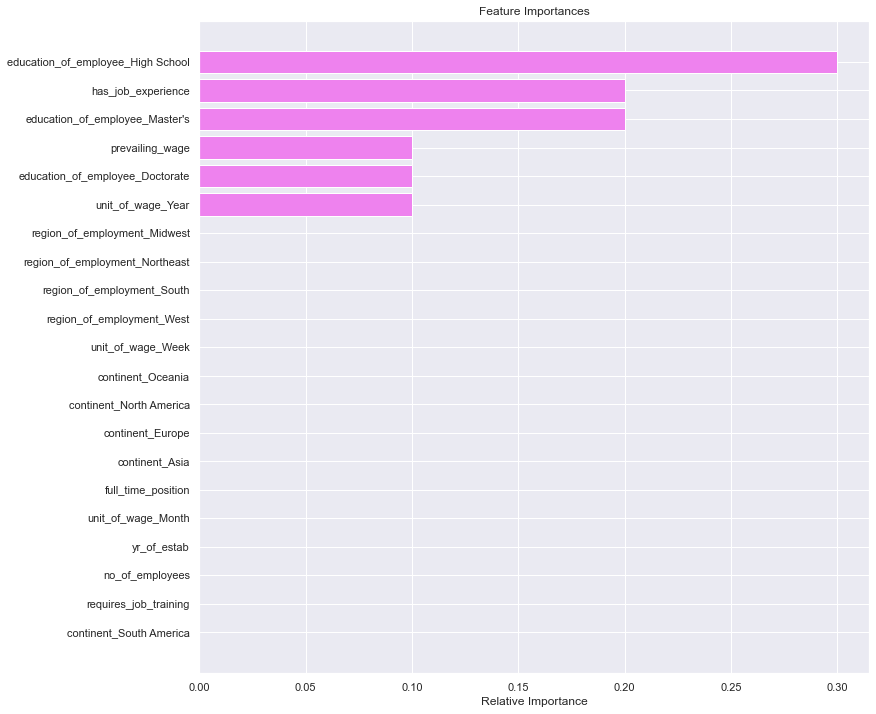

In [250]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Tuned Ada boost classifier is giving comparable results between training and test.
- Model performance is improved in terms of recall after tuning, but dropped for precision.
- The importance feature for this model is education_of_employee_High Schoo' and has_job_experience.


### Gradient Boosting Classifier - Tuned

In [91]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [189]:
#get accuracy, recall and precision on train and test set
gbc_init_tuned_train_score=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_train_score)
gbc_init_tuned_test_score=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Test performance:\n",gbc_tuned_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738772  0.901659   0.754474  0.821526
Test performance:
    Accuracy    Recall  Precision        F1
0  0.741585  0.905543   0.757057  0.824669


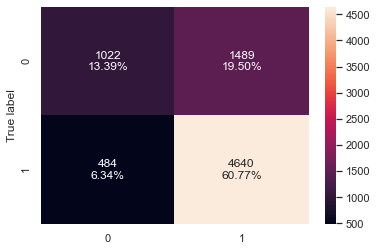

In [190]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

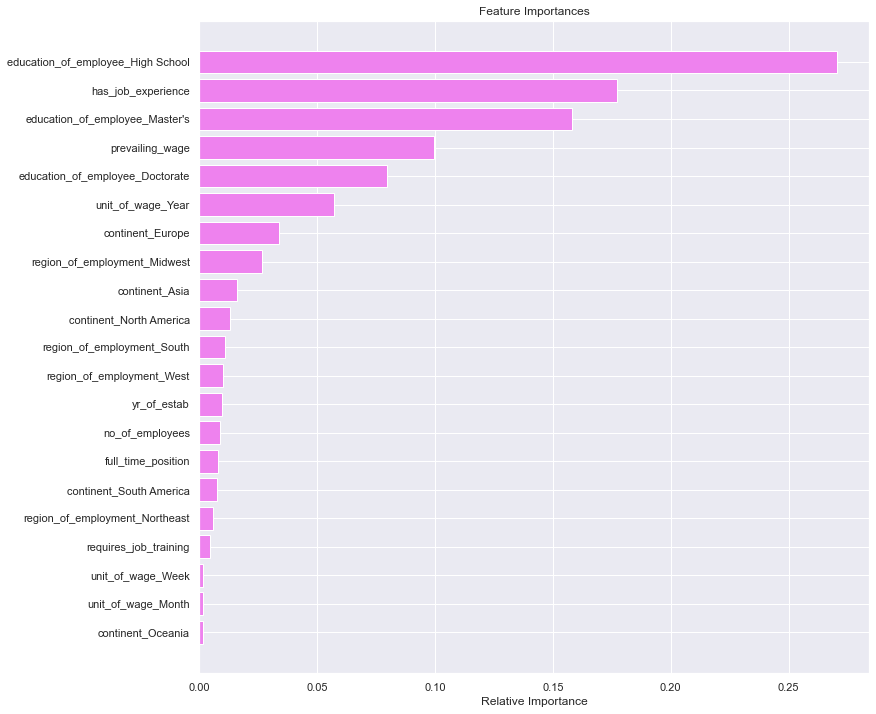

In [251]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Tuned Gradient boost classifier is giving comparable results between training and test.
- Model performance is improved interms of recall after tuning.
- The importance feature for this model is education_of_employee_High School and has_job_experience.

### XGBoost Classifier - Tuned

In [92]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')-020000000

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [191]:
#get accuracy, recall and precision on train and test set
xgb_tuned_train_score=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_train_score)
xgb_tuned_test_score=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Test performance:\n",xgb_tuned_test_score)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.666854     1.0   0.666835  0.800121
Test performance:
    Accuracy  Recall  Precision        F1
0   0.67112     1.0    0.67112  0.803198


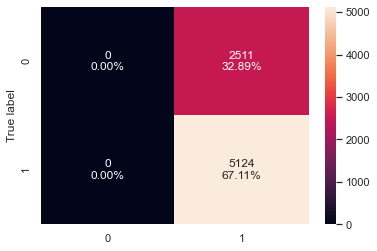

In [192]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

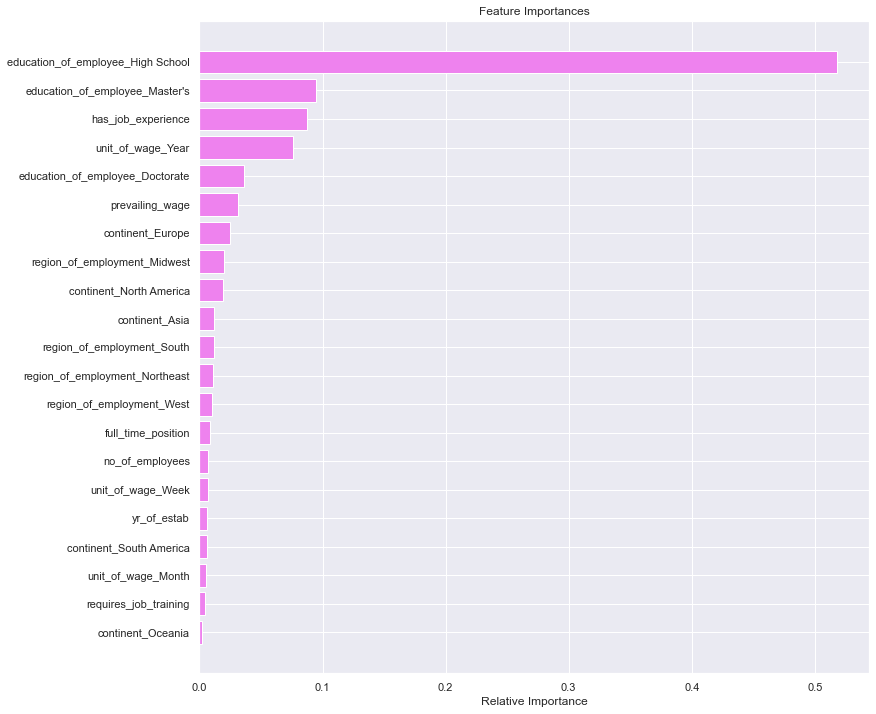

In [253]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Tuned XG boost classifier is giving comparable results between training and test.
- Model performance is has not improved on tuning and the model is biased.
- The importance feature for this model is education_of_employee_High School and education_of_employee_Master's.

## Comparing all models

In [236]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.precision_score(y_train,pred_train)
    test_f1 = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [255]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [256]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':F1_train,'Test_F1':F1_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,AdaBoost with default paramters,0.74,0.74,0.88,0.89,0.76,0.76,0.76,0.76
1,AdaBoost Tuned,0.69,0.69,0.97,0.97,0.69,0.69,0.69,0.69
2,Gradient Boosting with default parameters,0.76,0.75,0.88,0.88,0.78,0.78,0.78,0.78
3,Gradient Boosting with init=AdaBoost,0.75,0.75,0.88,0.88,0.78,0.78,0.78,0.78
4,Gradient Boosting Tuned,0.74,0.74,0.90,0.91,0.75,0.76,0.75,0.76
5,XGBoost with default parameters,0.83,0.74,0.93,0.86,0.84,0.78,0.84,0.78
6,XGBoost Tuned,0.67,0.67,1.00,1.00,0.67,0.67,0.67,0.67


-  	Gradient Boosting with default parameters  and Gradient Boosting with init=AdaBoost	 are more banaced models

## Stacking Model

**Now, let's build a stacking model with decision tree and tuned random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [228]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [263]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[05:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.665,
                                                                     1: 0.335},
                                                       max_depth=2,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.1,
                                                       min_samples_leaf=5,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.2,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,
                                                       n_estimators=150,
                                                      

In [233]:
#get accuracy, recall and precision on train and test set
stacking_model_train_score=model_performance_classification_sklearn(stacking_estimator,X_train,y_train)
print("Training performance:\n",stacking_model_train_score)
stacking_model_test_score=model_performance_classification_sklearn(stacking_estimator,X_test,y_test)
print("Test performance:\n",stacking_model_test_score)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753537  0.873116   0.782464  0.825308
Test performance:
    Accuracy    Recall  Precision        F1
0  0.752063  0.873731   0.782282  0.825482


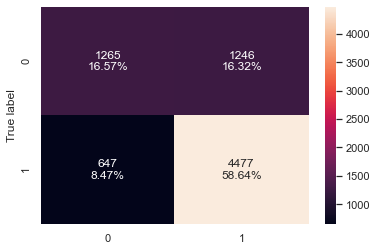

In [257]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

- The model appears to be generalized with comparable results in training and test.

In [243]:
# defining list of models
models = [d_tree, dtree_estimator, dtree_estimator_weight, rf_estimator, rf_estimator_tuned, rf_tuned_weight, bagging_estimator, bagging_estimator_tuned, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [244]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree Tuned','Decision Tree Tuned with class weight',
                                          'Random Forest Estimator','Random Forest Tuned','Random Forest Tuned with class weight','Bagging Classifier', 'Bagging Classifier  Tuned','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned',
                                         'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':F1_train,'Test_F1':F1_test}) 
comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.00,0.66,1.00,0.74,1.00,0.75,1.00,0.75
1,Decision Tree Tuned,0.67,0.67,1.00,1.00,0.67,0.67,0.67,0.67
2,Decision Tree Tuned with class weight,0.67,0.67,1.00,1.00,0.67,0.67,0.67,0.67
3,Random Forest Estimator,1.00,0.73,1.00,0.84,1.00,0.77,1.00,0.77
4,Random Forest Tuned,0.76,0.76,0.89,0.89,0.78,0.78,0.78,0.78
5,Random Forest Tuned with class weight,0.67,0.67,1.00,1.00,0.67,0.67,0.67,0.67
6,Bagging Classifier,0.99,0.70,0.99,0.78,0.99,0.78,0.99,0.78
7,Bagging Classifier Tuned,0.67,0.67,1.00,1.00,0.67,0.67,0.67,0.67
8,AdaBoost with default paramters,0.74,0.74,0.88,0.89,0.76,0.76,0.76,0.76
9,AdaBoost Tuned,0.69,0.69,0.97,0.97,0.69,0.69,0.69,0.69


- The below models have comparable performance and balanced performance
   - Gradient Boosting with default parameters
   - Gradient Boosting with init=AdaBoost
   - Stacking Classifier	
   - Random Forest Tuned

The Stacking Classifier might be the best model

##  Recommendations


- Aim would be to balance the trade off between losing an opportunity (Deny Visa to skilled and qualified individual) in case of FN and losing the resources of office of foreign labour certification in case of False positive.

- We emphasized that recall is the metric of interest here and we tuned our model on recall. But this does not mean that other metrics should be ignored completely.

- Different model indicate that the main feature is education_of_employee and has_job_experience.

- Employees with higher education have better rate of approval. Especially with Doctorate.

- Europe seems to have higher level of approvals.

- Pay unit of Yearly appears to be the most approved.
